# Import Basic Libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import socket

# Uploading the DataSet

In [0]:
df = pd.read_excel('Doctor_Fees.xlsx')

In [4]:
df.shape        #found 7 variables and 5961 rows in this dataset

(5961, 7)

In [5]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [6]:
df.info()       #all variables are object type except 'fees' in this particular dataset. And found null values in this dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
Qualification         5961 non-null object
Experience            5961 non-null object
Rating                2659 non-null object
Place                 5936 non-null object
Profile               5961 non-null object
Miscellaneous_Info    3341 non-null object
Fees                  5961 non-null int64
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [7]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [0]:
#Data Preprocessing of 'years_exp'
df['years_exp'] = df['Experience'].str.slice(stop=2).astype(int)

In [9]:
df.describe()

,Fees,years_exp
count,5961.000000,5961.000000
mean,307.944640,17.303976
std,190.920373,11.142798
min,5.000000,0.000000
25%,150.000000,9.000000
50%,300.000000,14.000000
75%,500.000000,23.000000
max,950.000000,66.000000


In [0]:
#Place
df['City'] = df['Place'].str.split(',').str[1]
df['Locality'] = df['Place'].str.split(',').str[0]

# Qualification

In [0]:
df['Qual_1'] = df['Qualification'].str.split(',').str[0]
df['Qual_2'] = df['Qualification'].str.split(',').str[1]
df['Qual_3'] = df['Qualification'].str.split(',').str[2]

# Miscellaneous_Info

In [0]:
df['Misc'] = df['Miscellaneous_Info'].str.split('%').str[0]

df['Misc_len'] = df['Misc'].str.len()

df.loc[df['Misc_len']>3, 'Misc'] = 0

df['Misc'].fillna(0,inplace = True)

df['Misc'] = df['Misc'].astype(int)

df['Misc_2'] = df['Miscellaneous_Info'].str.split('% ').str[1]

df['Misc_3'] = df['Misc_2'].str.split(' ').str[0]

df['Misc_3'].fillna(0,inplace = True)

df['Misc_3_len'] = df['Misc_3'].str.len()

df.loc[df['Misc_3_len']>3, 'Misc_3'] = 0

df.loc[df['Misc_3']==',', 'Misc_3'] = 0

df['Misc_3'] = df['Misc_3'].astype(int)

df['Fees1'] = df['Fees']

df = df.drop(['Fees'],axis=1)

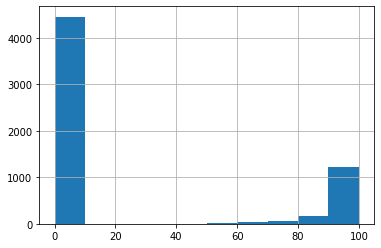

In [15]:
df['Misc'].hist();

In [0]:
df['Misc_4'] = df['Misc']*np.log((1+df['Misc_3']))

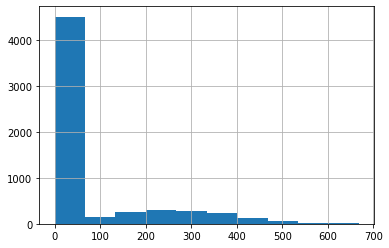

In [17]:
df['Misc_4'].hist()

In [0]:
df['Rating'].fillna('0%',inplace = True)

In [0]:
df['Rating'] = df['Rating'].str.slice(stop=-1).astype(int)

In [20]:
df['City'].unique()

array([' Ernakulam', ' Bangalore', ' Chennai', ' Delhi', ' Hyderabad',
       ' Coimbatore', ' Mumbai', ' Thiruvananthapuram', nan, ' Sector 5'],
      dtype=object)

In [21]:
df['Profile'].unique()

array(['Homeopath', 'Ayurveda', 'ENT Specialist', 'Dentist',
       'General Medicine', 'Dermatologists'], dtype=object)

In [22]:
df.dtypes

Qualification          object
Experience             object
Rating                  int64
Place                  object
Profile                object
Miscellaneous_Info     object
years_exp               int64
City                   object
Locality               object
Qual_1                 object
Qual_2                 object
Qual_3                 object
Misc                    int64
Misc_len              float64
Misc_2                 object
Misc_3                  int64
Misc_3_len            float64
Fees1                   int64
Misc_4                float64
dtype: object

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
df['City'].fillna("XXX",inplace = True)
df['Locality'].fillna("XXX",inplace = True)
df['Qualification'].fillna("XXX",inplace = True)
df['Profile'].fillna("XXX",inplace = True)
df['Qual_1'].fillna("XXX",inplace = True)
df['Qual_2'].fillna("XXX",inplace = True)
df['Qual_3'].fillna("XXX",inplace = True)

# EDA

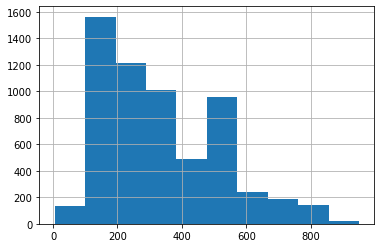

In [25]:
df['Fees1'].hist()

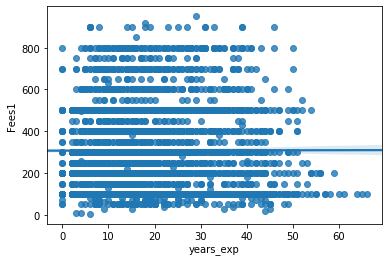

In [26]:
# No relation between 'years_exp' and 'Fees1'

sns.regplot(x='years_exp', y='Fees1', data=df)

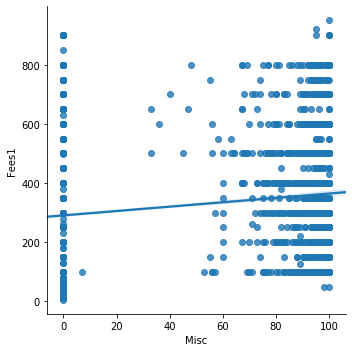

In [27]:
# Having some relation between 'Misc' and 'Fees1'. Percentage of higher feed back higher fees.

sns.lmplot(x='Misc', y='Fees1', data=df)

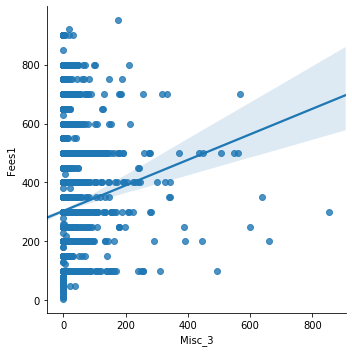

In [28]:
sns.lmplot(x='Misc_3', y='Fees1', data=df)    # fees would be increasing with the increase of no of feedback. Here 'Misc_3' indicates no of feedback.

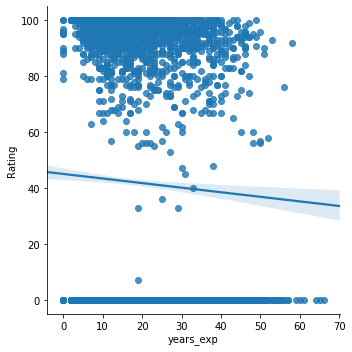

In [29]:
sns.lmplot(x='years_exp', y='Rating', data=df)  #Rating would be decreasing with increase of year_exp.

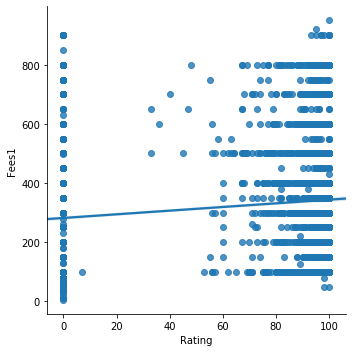

In [30]:
# Having relation between 'rating' and 'Fees1'. If rating is high then fees of the doctors would be high.

sns.lmplot(x='Rating', y='Fees1', data=df)

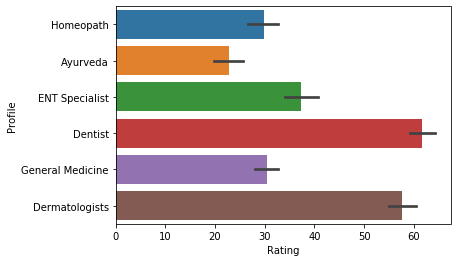

In [31]:
sns.barplot(data=df, y="Profile", x="Rating")   #avg. rating of dentist is high with compare to other doctor's profile(above 60).

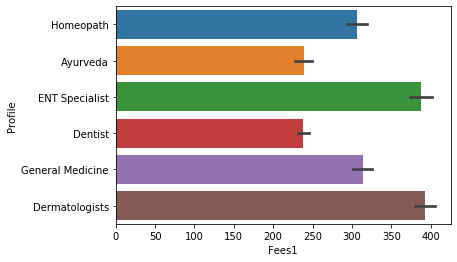

In [32]:
sns.barplot(data=df, y="Profile", x="Fees1")    #fees of Dermatologists is high.

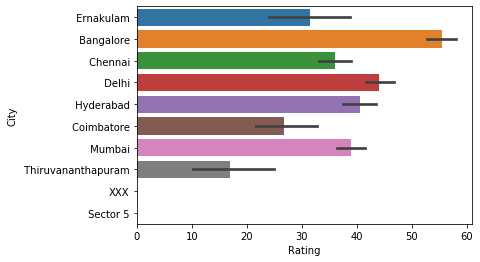

In [33]:
sns.barplot(data=df, y="City", x="Rating")   #rating of doctors in Bangalor is high with compare to other cities.

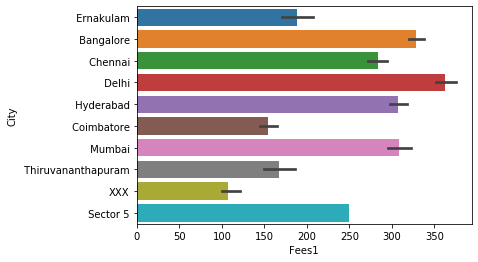

In [34]:
sns.barplot(data=df, y="City", x="Fees1")     #But fees of doctors in Delhi is high not only with compare to bangalor with also compare to others cities.

In [35]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,years_exp,City,Locality,Qual_1,Qual_2,Qual_3,Misc,Misc_len,Misc_2,Misc_3,Misc_3_len,Fees1,Misc_4
0,"BHMS, MD - Homeopathy",24 years experience,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",24,Ernakulam,Kakkanad,BHMS,MD - Homeopathy,XXX,100,3.0,"16 Feedback Kakkanad, Ernakulam",16,2.0,100,283.321334
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",12,Bangalore,Whitefield,BAMS,MD - Ayurveda Medicine,XXX,98,2.0,"76 Feedback Whitefield, Bangalore",76,2.0,350,425.692931
2,"MBBS, MS - Otorhinolaryngology",9 years experience,0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,9,Bangalore,Mathikere - BEL,MBBS,MS - Otorhinolaryngology,XXX,0,NaN,NaN,0,NaN,300,0.000000
3,"BSc - Zoology, BAMS",12 years experience,0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",12,Bangalore,Bannerghatta Road,BSc - Zoology,BAMS,XXX,0,58.0,NaN,0,NaN,250,0.000000
4,BAMS,20 years experience,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",20,Chennai,Keelkattalai,BAMS,XXX,XXX,100,3.0,"4 Feedback Keelkattalai, Chennai",4,1.0,250,160.943791


# LabelEncoding

In [0]:
lb_City = LabelEncoder()
df["City_code"] = lb_City.fit_transform(df["City"])

In [0]:
lb_Locality = LabelEncoder()
df["Locality_code"] = lb_Locality.fit_transform(df["Locality"])

In [0]:
lb_qual_1 = LabelEncoder()
df["Qual_1_code"] = lb_Locality.fit_transform(df["Qual_1"])

In [0]:
x = df.loc[df['Qual_1'] == 'Get inspired by remarkable stories of people like you', 'Qual_1_code']

In [40]:
x

91      70
502     70
599     70
605     70
724     70
1002    70
1083    70
1210    70
2078    70
2178    70
2328    70
3099    70
3228    70
3418    70
3443    70
3744    70
3804    70
4004    70
4758    70
4847    70
5058    70
5187    70
5551    70
5723    70
Name: Qual_1_code, dtype: int64

In [0]:
lb_qual_2 = LabelEncoder()
df["Qual_2_code"] = lb_Locality.fit_transform(df["Qual_2"])

In [0]:
lb_qual_3 = LabelEncoder()
df["Qual_3_code"] = lb_Locality.fit_transform(df["Qual_3"])

In [0]:
lb_Profile = LabelEncoder()
df["Profile_code"] = lb_Locality.fit_transform(df["Profile"])

In [44]:
np.where(df.dtypes != np.float)[0]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 17, 19,
       20, 21, 22, 23, 24])

In [0]:
df_xgb = df[['Qual_1_code','Qual_2_code','Qual_3_code','years_exp', 'Rating','Profile_code','Locality_code','City_code','Misc_4','Fees1']]

In [0]:
df1=pd.get_dummies(data=df_xgb,columns=['Qual_1_code','Qual_2_code','Qual_3_code','Profile_code','Locality_code','City_code'],drop_first=True)

In [47]:
df1.head()

,years_exp,Rating,Misc_4,Fees1,Qual_1_code_1,Qual_1_code_2,Qual_1_code_3,Qual_1_code_4,Qual_1_code_5,Qual_1_code_6,Qual_1_code_7,Qual_1_code_8,Qual_1_code_9,Qual_1_code_10,Qual_1_code_11,Qual_1_code_12,Qual_1_code_13,Qual_1_code_14,Qual_1_code_15,Qual_1_code_16,Qual_1_code_17,Qual_1_code_18,Qual_1_code_19,Qual_1_code_20,Qual_1_code_21,Qual_1_code_22,Qual_1_code_23,Qual_1_code_24,Qual_1_code_25,Qual_1_code_26,Qual_1_code_27,Qual_1_code_28,Qual_1_code_29,Qual_1_code_30,Qual_1_code_31,Qual_1_code_32,Qual_1_code_33,Qual_1_code_34,Qual_1_code_35,Qual_1_code_36,...,Locality_code_836,Locality_code_837,Locality_code_838,Locality_code_839,Locality_code_840,Locality_code_841,Locality_code_842,Locality_code_843,Locality_code_844,Locality_code_845,Locality_code_846,Locality_code_847,Locality_code_848,Locality_code_849,Locality_code_850,Locality_code_851,Locality_code_852,Locality_code_853,Locality_code_854,Locality_code_855,Locality_code_856,Locality_code_857,Locality_code_858,Locality_code_859,Locality_code_860,Locality_code_861,Locality_code_862,Locality_code_863,Locality_code_864,Locality_code_865,Locality_code_866,City_code_1,City_code_2,City_code_3,City_code_4,City_code_5,City_code_6,City_code_7,City_code_8,City_code_9
0,24,100,283.321334,100,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,12,98,425.692931,350,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9,0,0.000000,300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,12,0,0.000000,250,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,20,100,160.943791,250,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


#Split the DataSet into Train & Test



In [0]:
from sklearn.model_selection import train_test_split
X=df1.drop(['Fees1'],axis=1)
y=df1['Fees1']


# XGboost

In [0]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [50]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## ANN


In [52]:
from keras.layers import Dense, Input, BatchNormalization
from keras.models import Model
from keras.optimizers import SGD, RMSprop, Adam

Using TensorFlow backend.


In [53]:
import keras
keras.backend.clear_session
inp = Input(shape=[1865], dtype=np.float32)
x = BatchNormalization()(inp)
x = Dense(units=16, activation='relu')(inp)
x = BatchNormalization()(x)
x = Dense(units=32, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(units=32, activation='relu')(x)
out = Dense(units=1, activation='linear')(x)
model = Model(inp, out)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model.summary()






Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1865)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                29856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 16)                64        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
batch_normalization_3 (Batch (None, 32)                128       
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                

In [54]:
reg = model.fit(x=X_train, y=y_train, batch_size=32, epochs=50, validation_split=0.3, verbose=1)




Train on 2920 samples, validate on 1252 samples
Epoch 1/50





2920/2920 [==============================] - 1s 479us/step - loss: 125637.3045 - mean_absolute_error: 301.4940 - val_loss: 133854.1291 - val_mean_absolute_error: 307.4372
Epoch 2/50
2920/2920 [==============================] - 0s 135us/step - loss: 120182.8447 - mean_absolute_error: 292.6015 - val_loss: 125280.8967 - val_mean_absolute_error: 293.7249
Epoch 3/50
2920/2920 [==============================] - 0s 131us/step - loss: 104794.5107 - mean_absolute_error: 265.3667 - val_loss: 100525.7690 - val_mean_absolute_error: 249.2159
Epoch 4/50
2920/2920 [==============================] - 0s 133us/step - loss: 78013.4942 - mean_absolute_error: 216.1098 - val_loss: 73154.7593 - val_mean_absolute_error: 201.5679
Epoch 5/50
2920/2920 [==============================] - 0s 140us/step - loss: 51012.6778 - mean_absolute_error: 168.3770 - val_loss: 53322.0737 - val_mean_absolute_error: 173.3778
Epoch 6/50
2920/2920 [================

In [0]:
p = model.predict(X_test)

In [56]:
rmse = np.sqrt(mean_squared_error(y_test, p))
print("RMSE: %f" % (rmse))

RMSE: 204.197557


In [0]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, n_estimators = 10)

In [58]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:43:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [59]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 212.785066


In [60]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                     num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[11:43:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:43:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:43:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [61]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,335.436391,4.590732,335.429647,10.371445
1,311.927246,4.354219,312.021281,10.290393
2,291.172404,4.252207,291.395477,10.225269
3,273.105601,4.189069,273.581126,10.088039
4,257.450251,4.065410,258.094340,9.894153


In [62]:
print((cv_results["test-rmse-mean"]).tail(1))

49    168.579285
Name: test-rmse-mean, dtype: float64


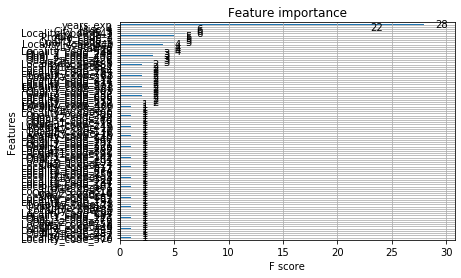

In [63]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

# SVR

In [0]:
from sklearn.svm import SVR
import numpy as np
svr = SVR(kernel="rbf", gamma=0.1)

In [65]:
svr.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
y_predict=svr.predict(X_test)

In [67]:
rmse = np.sqrt(mean_squared_error(y_test, y_predict))
print("RMSE: %f" % (rmse))

RMSE: 191.112630


# Decision Tree & Random Forest

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 

In [69]:
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()

dt.fit(X_train,y_train)
rf.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [0]:
y_predict1=dt.predict(X_test)
y_predict2=rf.predict(X_test)

In [71]:
rmse = np.sqrt(mean_squared_error(y_test, y_predict1))
print("RMSE: %f" % (rmse))

RMSE: 220.282928


In [97]:
rmse = np.sqrt(mean_squared_error(y_test, y_predict2))
print("RMSE: %f" % (rmse))

RMSE: 176.635141


Though RMSE score is low for Random Forest among all applied regression models, I would like to take Random Forest in model selection.